# Analysis of variation in *Pseudomonas aeruginosa* strains with evolved antibiotic resistance

First from [NCBI website](https://www.ncbi.nlm.nih.gov/Traces/study/?WebEnv=NCID_1_23725767_130.14.18.48_5555_1513784368_1248676440_0MetA0_S_HStore&query_key=3) download SraRunTable.txt file for BioProject PRJNA355367. This file allows to link SRA accession numbers for experimenbtal conditions from [Barbosa et al. 2017](http://dx.doi.org/10.1093/molbev/msx158).

In [2]:
import pandas as pd

In [3]:
%cd /Volumes/data4t/seq/Barbosa_2017

/Volumes/data4t/seq/Barbosa_2017


In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [5]:
# Here we read SraRunTable.txt file and covert it into a disctionary with conditions as keys. 
# Each key corresponds to an arrray containing accession numbers

import os
from collections import defaultdict
conditions = defaultdict(list) 
fields = []
acc = []
for line in open('SraRunTable.txt','r'):
    fields = line.strip().split("\t")
    tag = fields[3][0:3]
    srr = fields[6]
    if tag != 'Lib': # This prevenets including info from the header line
        conditions[tag].append(srr)

In [6]:
# Let's just make sure it looks good:
print conditions

defaultdict(<type 'list'>, {'wtP': ['SRR5363633'], 'cef': ['SRR5363684', 'SRR5363685', 'SRR5363686', 'SRR5363687', 'SRR5363688', 'SRR5363689', 'SRR5363690', 'SRR5363691', 'SRR5363692', 'SRR5363693'], 'imi': ['SRR5363694', 'SRR5363695'], 'car': ['SRR5363674', 'SRR5363675', 'SRR5363676', 'SRR5363677', 'SRR5363678', 'SRR5363679', 'SRR5363680', 'SRR5363681', 'SRR5363682', 'SRR5363683'], 'cip': ['SRR5363706', 'SRR5363707', 'SRR5363708', 'SRR5363709', 'SRR5363710', 'SRR5363711', 'SRR5363712', 'SRR5363713', 'SRR5363714', 'SRR5363715'], 'str': ['SRR5363644', 'SRR5363645', 'SRR5363646', 'SRR5363647', 'SRR5363648', 'SRR5363649', 'SRR5363650', 'SRR5363651', 'SRR5363652', 'SRR5363653'], 'dor': ['SRR5363696', 'SRR5363697', 'SRR5363698', 'SRR5363699', 'SRR5363700', 'SRR5363701', 'SRR5363702', 'SRR5363703', 'SRR5363704', 'SRR5363705'], 'pit': ['SRR5363664', 'SRR5363665', 'SRR5363667', 'SRR5363666', 'SRR5363668', 'SRR5363669', 'SRR5363670', 'SRR5363671', 'SRR5363672', 'SRR5363673'], 'gen': ['SRR536365

In [358]:
!mkdir renamed

In [359]:
# Copiybf original files into files that have condition name in the name

for condition in conditions:
    for accession in conditions[ condition ]:
        
        # Comment all print statements and uncomment os.system
        # To actually run these
        
        #print 'cp %s_1.fastq.gz ./renamed/%s_%s_1.fq.gz' %  ( accession, accession, condition ) 
        #print 'cp %s_2.fastq.gz ./renamed/%s_%s_2.fq.gz' %  ( accession, accession, condition ) 
        os.system( 'cp %s_1.fastq.gz ./renamed/%s_%s_1.fq.gz' %  ( accession, accession, condition ) )
        os.system( 'cp %s_2.fastq.gz ./renamed/%s_%s_2.fq.gz' %  ( accession, accession, condition ) )

In [3]:
# Concatenate individual forward and reverse reads from each condition so that there is only one
# pair of forward and reverse reads for each condition
# This would make it easier to create condition-specific assemblies

for condition in conditions:
    for accession in conditions[ condition ]:
        
        # Comment all print statements and uncomment os.system
        # To actually run these
        
        print 'gunzip -c %s_1.fastq.gz | gzip >> %s_1.fq.gz' %  ( accession, condition ) 
        print 'gunzip -c %s_2.fastq.gz | gzip >> %s_2.fq.gz' %  ( accession, condition ) 
        #os.system( 'gunzip -c %s_1.fastq.gz | gzip >> %s_1.fq.gz' %  ( accession, condition ) )
        #os.system( 'gunzip -c %s_2.fastq.gz | gzip >> %s_2.fq.gz' %  ( accession, condition ) )

gunzip -c SRR5363633_1.fastq.gz | gzip >> wtP_1.fq.gz
gunzip -c SRR5363633_2.fastq.gz | gzip >> wtP_2.fq.gz
gunzip -c SRR5363684_1.fastq.gz | gzip >> cef_1.fq.gz
gunzip -c SRR5363684_2.fastq.gz | gzip >> cef_2.fq.gz
gunzip -c SRR5363685_1.fastq.gz | gzip >> cef_1.fq.gz
gunzip -c SRR5363685_2.fastq.gz | gzip >> cef_2.fq.gz
gunzip -c SRR5363686_1.fastq.gz | gzip >> cef_1.fq.gz
gunzip -c SRR5363686_2.fastq.gz | gzip >> cef_2.fq.gz
gunzip -c SRR5363687_1.fastq.gz | gzip >> cef_1.fq.gz
gunzip -c SRR5363687_2.fastq.gz | gzip >> cef_2.fq.gz
gunzip -c SRR5363688_1.fastq.gz | gzip >> cef_1.fq.gz
gunzip -c SRR5363688_2.fastq.gz | gzip >> cef_2.fq.gz
gunzip -c SRR5363689_1.fastq.gz | gzip >> cef_1.fq.gz
gunzip -c SRR5363689_2.fastq.gz | gzip >> cef_2.fq.gz
gunzip -c SRR5363690_1.fastq.gz | gzip >> cef_1.fq.gz
gunzip -c SRR5363690_2.fastq.gz | gzip >> cef_2.fq.gz
gunzip -c SRR5363691_1.fastq.gz | gzip >> cef_1.fq.gz
gunzip -c SRR5363691_2.fastq.gz | gzip >> cef_2.fq.gz
gunzip -c SRR5363692_1.fastq

In [4]:
for condition in conditions:
    
    # Comment all print statements and uncomment os.system
    # To actually run these
    
    print 'mkdir %s' % ( condition ) 
    print 'unicycler -1 %s_1.fq.gz -2 %s_2.fq.gz -o %s/ -t 22' % ( condition, condition, condition )
    #os.system( 'mkdir %s' % ( condition ) )
    #os.system( 'unicycler -1 %s_1.fq.gz -2 %s_2.fq.gz -o %s/ -t 22' % ( condition, condition, condition ) )

mkdir wtP
unicycler -1 wtP_1.fq.gz -2 wtP_2.fq.gz -o wtP/ -t 22
mkdir cef
unicycler -1 cef_1.fq.gz -2 cef_2.fq.gz -o cef/ -t 22
mkdir imi
unicycler -1 imi_1.fq.gz -2 imi_2.fq.gz -o imi/ -t 22
mkdir car
unicycler -1 car_1.fq.gz -2 car_2.fq.gz -o car/ -t 22
mkdir cip
unicycler -1 cip_1.fq.gz -2 cip_2.fq.gz -o cip/ -t 22
mkdir str
unicycler -1 str_1.fq.gz -2 str_2.fq.gz -o str/ -t 22
mkdir dor
unicycler -1 dor_1.fq.gz -2 dor_2.fq.gz -o dor/ -t 22
mkdir pit
unicycler -1 pit_1.fq.gz -2 pit_2.fq.gz -o pit/ -t 22
mkdir gen
unicycler -1 gen_1.fq.gz -2 gen_2.fq.gz -o gen/ -t 22
mkdir con
unicycler -1 con_1.fq.gz -2 con_2.fq.gz -o con/ -t 22


In [5]:
# Making directiory to store nucmer results
!mkdir mum

mkdir: mum: File exists


In [6]:
# Running nucmer: aligning assemblies of individual conditions
# against Pseudomonas_aeruginosa_UCBPP-PA14_109.fna genome

for condition in conditions:
    
    # Comment all print statements and uncomment os.system
    # To actually run these
    
    print 'nucmer -p %s pa14/Pseudomonas_aeruginosa_UCBPP-PA14_109.fna %s/assembly.fasta' % ( condition,condition )
    print 'mv %s.delta mum/' % ( condition )
    #os.system('nucmer -p %s pa14/Pseudomonas_aeruginosa_UCBPP-PA14_109.fna %s/assembly.fasta' % ( condition,condition ) )
    #os.system('mv %s.delta mum/' % ( condition ) )

nucmer -p wtP pa14/Pseudomonas_aeruginosa_UCBPP-PA14_109.fna wtP/assembly.fasta
mv wtP.delta mum/
nucmer -p cef pa14/Pseudomonas_aeruginosa_UCBPP-PA14_109.fna cef/assembly.fasta
mv cef.delta mum/
nucmer -p imi pa14/Pseudomonas_aeruginosa_UCBPP-PA14_109.fna imi/assembly.fasta
mv imi.delta mum/
nucmer -p car pa14/Pseudomonas_aeruginosa_UCBPP-PA14_109.fna car/assembly.fasta
mv car.delta mum/
nucmer -p cip pa14/Pseudomonas_aeruginosa_UCBPP-PA14_109.fna cip/assembly.fasta
mv cip.delta mum/
nucmer -p str pa14/Pseudomonas_aeruginosa_UCBPP-PA14_109.fna str/assembly.fasta
mv str.delta mum/
nucmer -p dor pa14/Pseudomonas_aeruginosa_UCBPP-PA14_109.fna dor/assembly.fasta
mv dor.delta mum/
nucmer -p pit pa14/Pseudomonas_aeruginosa_UCBPP-PA14_109.fna pit/assembly.fasta
mv pit.delta mum/
nucmer -p gen pa14/Pseudomonas_aeruginosa_UCBPP-PA14_109.fna gen/assembly.fasta
mv gen.delta mum/
nucmer -p con pa14/Pseudomonas_aeruginosa_UCBPP-PA14_109.fna con/assembly.fasta
mv con.delta mum/


In [7]:
!ls mum

car.coord.tab          con.fplot              lastz_pa14_car.bam.bai
car.delta              con.rplot              pit.coord.tab
car.fplot              dor.coord.tab          pit.delta
car.rplot              dor.delta              pit.fplot
car_align.bam          dor.fplot              pit.rplot
cef.coord.tab          dor.rplot              str.coord.tab
cef.delta              gen.coord.tab          str.delta
cef.fplot              gen.delta              str.fplot
cef.rplot              gen.fplot              str.rplot
cip.coord.tab          gen.rplot              wtP.coord.tab
cip.delta              imi.coord.tab          wtP.delta
cip.fplot              imi.delta              wtP.fplot
cip.rplot              imi.fplot              wtP.rplot
con.coord.tab          imi.rplot
con.delta              lastz_pa14_car.bam


In [8]:
# Running mummerplot: converting nucmer delta files into
# coordinates of alignable fragments

for condition in conditions:
    
    # Comment all print statements and uncomment os.system
    # To actually run these
    
    print 'mummerplot -Q %s/assembly.fasta --layout -p %s mum/%s.delta' % ( condition, condition, condition ) 
    print 'mv %s.fplot mum/' % condition 
    print 'mv %s.rplot mum/' % condition 
    
    #os.system('mummerplot -Q %s/assembly.fasta --layout -p %s mum/%s.delta' % ( condition, condition, condition ) )
    #os.system('mv %s.fplot mum/' % condition )
    #os.system('mv %s.rplot mum/' % condition )

mummerplot -Q wtP/assembly.fasta --layout -p wtP mum/wtP.delta
mv wtP.fplot mum/
mv wtP.rplot mum/
mummerplot -Q cef/assembly.fasta --layout -p cef mum/cef.delta
mv cef.fplot mum/
mv cef.rplot mum/
mummerplot -Q imi/assembly.fasta --layout -p imi mum/imi.delta
mv imi.fplot mum/
mv imi.rplot mum/
mummerplot -Q car/assembly.fasta --layout -p car mum/car.delta
mv car.fplot mum/
mv car.rplot mum/
mummerplot -Q cip/assembly.fasta --layout -p cip mum/cip.delta
mv cip.fplot mum/
mv cip.rplot mum/
mummerplot -Q str/assembly.fasta --layout -p str mum/str.delta
mv str.fplot mum/
mv str.rplot mum/
mummerplot -Q dor/assembly.fasta --layout -p dor mum/dor.delta
mv dor.fplot mum/
mv dor.rplot mum/
mummerplot -Q pit/assembly.fasta --layout -p pit mum/pit.delta
mv pit.fplot mum/
mv pit.rplot mum/
mummerplot -Q gen/assembly.fasta --layout -p gen mum/gen.delta
mv gen.fplot mum/
mv gen.rplot mum/
mummerplot -Q con/assembly.fasta --layout -p con mum/con.delta
mv con.fplot mum/
mv con.rplot mum/


In [9]:
!ls mum

car.coord.tab          con.fplot              lastz_pa14_car.bam.bai
car.delta              con.rplot              pit.coord.tab
car.fplot              dor.coord.tab          pit.delta
car.rplot              dor.delta              pit.fplot
car_align.bam          dor.fplot              pit.rplot
cef.coord.tab          dor.rplot              str.coord.tab
cef.delta              gen.coord.tab          str.delta
cef.fplot              gen.delta              str.fplot
cef.rplot              gen.fplot              str.rplot
cip.coord.tab          gen.rplot              wtP.coord.tab
cip.delta              imi.coord.tab          wtP.delta
cip.fplot              imi.delta              wtP.fplot
cip.rplot              imi.fplot              wtP.rplot
con.coord.tab          imi.rplot
con.delta              lastz_pa14_car.bam


In [7]:
# Here we retain lines containing coordinates of alignemnts between
# individual assemblies and pa14 reference

for condition in conditions:
    os.system( "egrep -v '^0|#|^$' mum/%s.fplot mum/%s.rplot | cut -d \":\" -f 2 > mum/%s.coord.tab" % ( condition, condition, condition ) )

In [8]:
!ls mum

car.coord.tab          con.fplot              lastz_pa14_car.bam.bai
car.delta              con.rplot              pit.coord.tab
car.fplot              dor.coord.tab          pit.delta
car.rplot              dor.delta              pit.fplot
car_align.bam          dor.fplot              pit.rplot
cef.coord.tab          dor.rplot              str.coord.tab
cef.delta              gen.coord.tab          str.delta
cef.fplot              gen.delta              str.fplot
cef.rplot              gen.fplot              str.rplot
cip.coord.tab          gen.rplot              wtP.coord.tab
cip.delta              imi.coord.tab          wtP.delta
cip.fplot              imi.delta              wtP.fplot
cip.rplot              imi.fplot              wtP.rplot
con.coord.tab          imi.rplot
con.delta              lastz_pa14_car.bam


In [10]:
# Here we read mummerplot files and load this information
# into cond_data dictionary

from collections import defaultdict
cond_data = defaultdict(list) 

for condition in conditions:
    start_end = []
    coord = []
    for n, line in enumerate( open('mum/%s.coord.tab' % condition,'r'), 1):
        fields = line.strip().split( " " )
        if n % 2 == 1:
            start_end.append( [ int( fields[0] ), int( fields[1] ) ] )
        else:
            start_end.append( [ int( fields[0] ), int( fields[1] ) ] )
            coord.append( start_end )
            start_end = []
    cond_data[ condition ] = coord 

In [13]:
cond_data

defaultdict(list,
            {'car': [[[113335, 2494540], [114930, 2496135]],
              [[298501, 2442017], [299416, 2442944]],
              [[5461056, 5119598], [5461151, 5119693]],
              [[737958, 692934], [738070, 693046]],
              [[2970233, 2677731], [2971898, 2679396]],
              [[2982773, 2680544], [2984996, 2682767]],
              [[2979963, 2680917], [2982529, 2683483]],
              [[3555354, 761725], [3560650, 767021]],
              [[2976776, 2677731], [2979589, 2680544]],
              [[6187530, 5840372], [6203989, 5856834]],
              [[6203990, 5856834], [6206152, 5858995]],
              [[806751, 761725], [812047, 767021]],
              [[1858473, 1810050], [1860416, 1811993]],
              [[732658, 687635], [737957, 692934]],
              [[5121746, 4780806], [5259187, 4918213]],
              [[4957670, 4616733], [5141727, 4800753]],
              [[1115402, 1070306], [1196300, 1151204]],
              [[3208018, 2885842], [34627

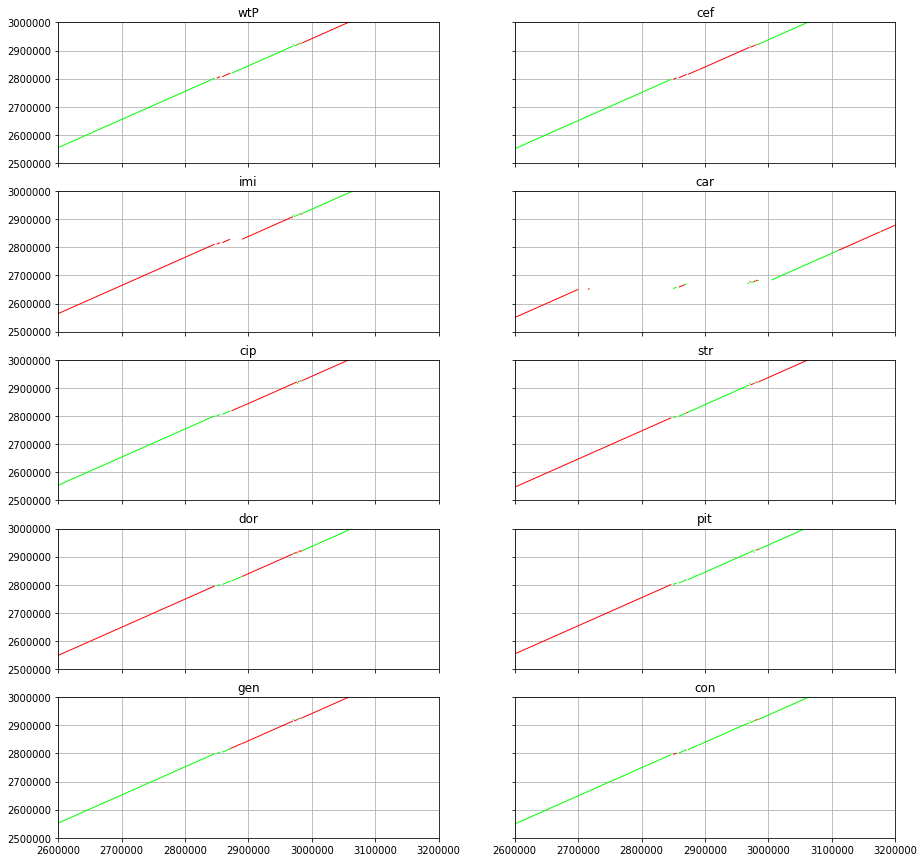

In [13]:
# Here we generate dot plot for all ten conditions
# A deletion in car assembly can be cearly see here
# Uncommenting set_ylim and set_xlim will zoom in into this deletion

import numpy as np
import pylab as pl
from matplotlib import collections as mc
import matplotlib.ticker as ticker

c = np.array([(1, 0, 0, 1), (0, 1, 0, 1)])

fig, ax = pl.subplots( 5,2, figsize=(15, 15), sharey=True, sharex=True )

ax = ax.ravel()

for i, condition in enumerate( cond_data  ):
    lc = mc.LineCollection(cond_data[ condition ], colors=c, linewidths=1)
    ax[i].add_collection(lc)
    ax[i].autoscale()
    ax[i].set_title('%s' % condition )
    ax[i].plot()
    ax[i].set_ylim([2500000,3000000])
    ax[i].set_xlim([2600000,3200000])
    ax[i].grid(True)
    ax[i].margins(0.1)
    
pl.show()

## Investigating deletion in carbenicillin evolved strains in more detail

First we will produce an accurate alignemnt between **car** assembly and PA14 reference genome using lastz aligner (it can be installed using bioconda)

In [ ]:
!mkdir car_analysis

In [14]:
%cd car_analysis

/Volumes/data4t/seq/Barbosa_2017/car_analysis


In [ ]:
# Download genomic sequence and gene annotation data
!wget http://pseudomonas.com/downloads/pseudomonas/pgd_r_17_2/Pseudomonas_aeruginosa_UCBPP-PA14_109/Pseudomonas_aeruginosa_UCBPP-PA14_109.fna
!wget http://pseudomonas.com/downloads/pseudomonas/pgd_r_17_1/Pseudomonas_aeruginosa_UCBPP-PA14_109/Pseudomonas_aeruginosa_UCBPP-PA14_109.gtf    

In [ ]:
# The FASTA id line for the PA14 reference genome looks like this
!head -n 1 Pseudomonas_aeruginosa_UCBPP-PA14_109.fna

The `>gi|116048575|ref|NC_008463|pseudocap|138` is a problem as lastz and many other downstream applications will 
only recignize thebeginning `gi`. So, let's rename it.

In [ ]:
!cat Pseudomonas_aeruginosa_UCBPP-PA14_109.fna | sed s/^\>.*/\>pa14/ > pa14.fna

And then we will do the same with replacing `chromsome` in gff file with `pa14`:

In [ ]:
!cat Pseudomonas_aeruginosa_UCBPP-PA14_109.gtf | sed s/^chromosome/pa14/ > pa14.gtf

Now we will align car assembly against pa14 reference:

In [ ]:
!lastz pa14.fna ../car/assembly.fasta --notransition --step=20 --nogapped --format=sam > lastz_pa14_car.sam

In [ ]:
# Convert lastz-generated sam file to bam format and sort it
!samtools view -bh lastz_pa14_car.sam | samtools sort - > lastz_pa14_car.bam
!samtools index lastz_pa14_car.bam

We can now start IGV and view alignment on the genome along with the genes

In [121]:
!igv

INFO [2018-01-12 14:41:16,899]  [DirectoryManager.java:169] [AWT-EventQueue-0]  IGV Directory: /Users/anton/igv
INFO [2018-01-12 14:41:16,899] [DirectoryManager.java:169]  IGV Directory: /Users/anton/igv
INFO [2018-01-12 14:41:16,904]  [Main.java:151] [AWT-EventQueue-0]  Startup  IGV Version 2.3.98 (158)07/25/2017 12:02 AM
INFO [2018-01-12 14:41:16,904]  [Main.java:152] [AWT-EventQueue-0]  Java 1.8.0_121
INFO [2018-01-12 14:41:16,904]  [DirectoryManager.java:72] [AWT-EventQueue-0]  Fetching user directory... 
INFO [2018-01-12 14:41:16,990]  [Main.java:153] [AWT-EventQueue-0]  Default User Directory: /Users/anton
INFO [2018-01-12 14:41:16,990]  [Main.java:154] [AWT-EventQueue-0]  OS: Mac OS X
INFO [2018-01-12 14:41:29,017]  [GenomeManager.java:163] [pool-1-thread-1]  Loading genome: /Volumes/data/seq/Barbosa_2017/car_analysis/pa14.fna
INFO [2018-01-12 14:41:29,030]  [GenomeManager.java:210] [pool-1-thread-1]  Genome loaded.  id= /Volumes/data/seq/Barbosa_2017/car_analysis/pa14.fna
INFO 

In [ ]:
!bwa index pa14.fna 

In [ ]:
# Here we will align individual read sets against pa14 genome
# As always uncomment os statements to run actual jobs

for condition in conditions:
    for accession in conditions[ condition ]:
        os.system("bwa mem -R '@RG\tID:%s\tSM:%s' -t 24 pa14.fna ../%s_1.fastq.gz ../%s_2.fastq.gz | samtools view -bh |  samtools sort - > %s-%s.bam" % ( accession, condition, accession, accession, accession, condition ))
        os.system('samtools index %s-%s.bam' % ( accession, condition ))
        #print "bwa mem -R '@RG\tID:%s\tSM:%s' -t 24 pa14.fna %s_1.fastq.gz %s_2.fastq.gz | samtools view -bh |  samtools sort - > %s-%s.bam" % ( accession, condition, accession, accession, accession, condition )
        #print 'samtools index %s-%s.bam' % ( accession, condition )

Now let's plot coverage distribution across pa14 genome

In [ ]:
# First let's compute coverage for all datasets

f = open('compute_cvrg.sh', 'w')

for condition in conditions:
    for accession in conditions[ condition ]:
        f.write('samtools depth -a %s-%s.bam | cut -f 3 > %s-%s.cvrg &\n' % ( accession, condition, accession, condition ) ) 
        

In [ ]:
!head -n 10 compute_cvrg.sh

In [ ]:
!sh compute_cvrg.sh

In [38]:
import pandas as pd

cvrg = pd.DataFrame()

for condition in conditions:
    for accession in conditions[ condition ]:
        f = open( '%s-%s.cvrg' % (accession, condition), 'r')
        c = []
        for line in f:
            c.append( int(line.strip() ) ) 
        c.append
        f.close()
        cvrg['%s-%s' % (accession, condition) ] = c


KeyboardInterrupt: 

In [33]:
cvrg_100bp = cvrg.rolling(100, center=True).mean().dropna(axis=0, how='any')

In [34]:
cvrg_100bp.head()

,SRR5363633-wtP,SRR5363684-cef,SRR5363685-cef,SRR5363686-cef,SRR5363687-cef,SRR5363688-cef,SRR5363689-cef,SRR5363690-cef,SRR5363691-cef,SRR5363692-cef,...,SRR5363634-con,SRR5363635-con,SRR5363636-con,SRR5363637-con,SRR5363639-con,SRR5363640-con,SRR5363641-con,SRR5363642-con,SRR5363643-con,SRR5363638-con
50,307.03,47.81,37.94,37.41,65.25,42.02,22.61,358.57,16.98,29.27,...,38.68,29.76,43.40,112.50,80.26,108.61,81.99,83.02,68.06,114.48
51,309.21,47.96,38.13,37.54,65.49,42.12,22.66,360.92,16.93,29.35,...,39.09,30.04,43.55,113.15,80.71,109.28,82.53,83.43,68.46,114.89
52,311.66,48.15,38.37,37.68,65.76,42.22,22.73,363.54,16.89,29.42,...,39.51,30.33,43.71,113.82,81.22,110.03,83.18,83.88,68.92,115.38
53,314.08,48.34,38.61,37.82,66.02,42.32,22.79,366.11,16.85,29.48,...,39.92,30.62,43.87,114.49,81.71,110.76,83.84,84.32,69.37,115.86
54,316.55,48.55,38.86,37.97,66.31,42.45,22.84,368.76,16.81,29.54,...,40.32,30.91,44.04,115.16,82.22,111.49,84.50,84.77,69.81,116.33


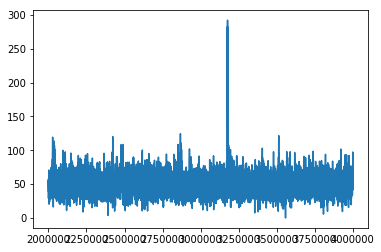

In [41]:
%matplotlib inline
cvrg_100bp['SRR5363684-cef'][2000000:4000000].plot()

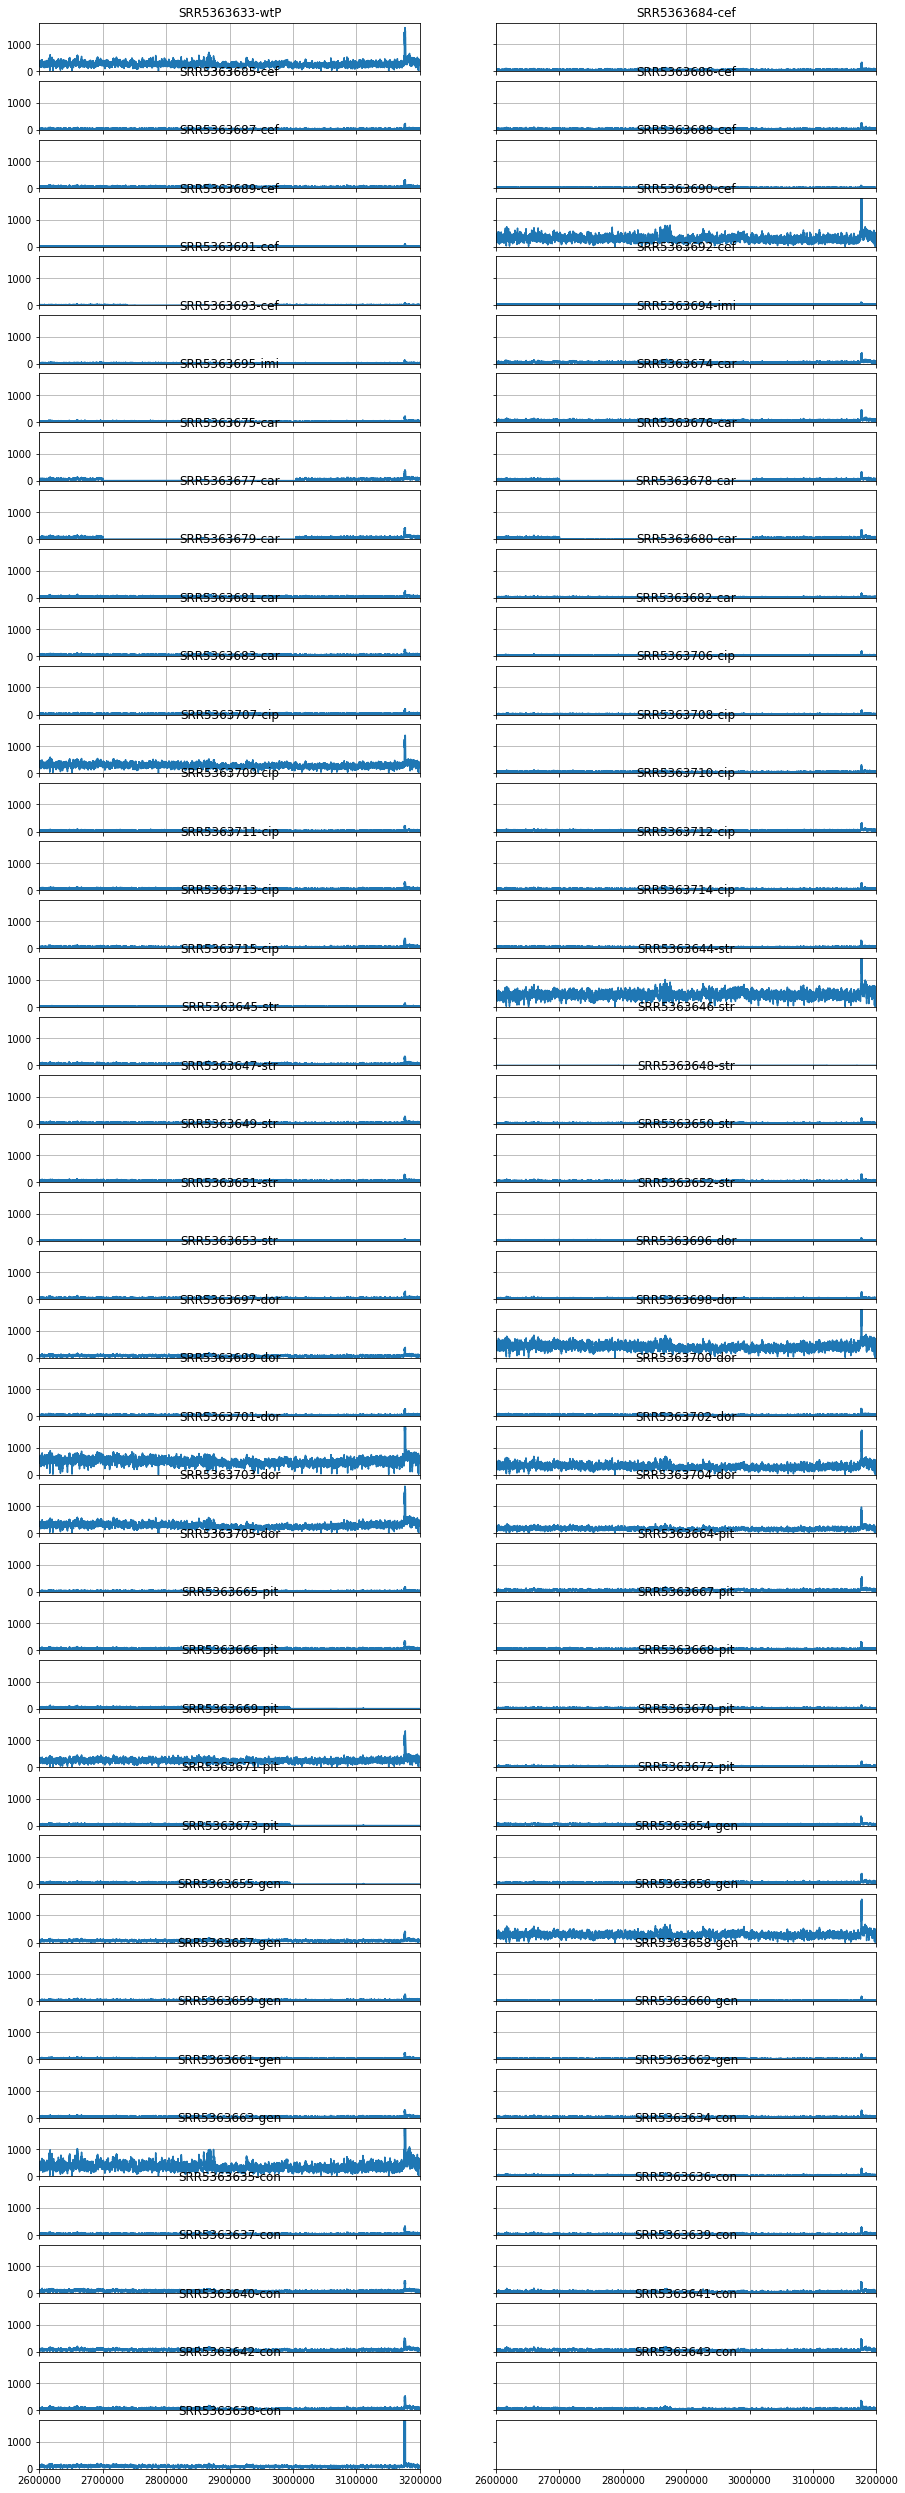

In [49]:
import numpy as np
import pylab as pl
from matplotlib import collections as mc
import matplotlib.ticker as ticker

fig, ax = pl.subplots(42,2, figsize=(15, 45), sharey=True, sharex=True )

ax = ax.ravel()



for i, sample in enumerate( list(cvrg) ):
    ax[i].autoscale()
    ax[i].set_title( sample )
    ax[i].plot(cvrg[sample])
    ax[i].set_ylim([0,1800])
    ax[i].set_xlim([2600000,3200000])
    ax[i].grid(True)
    ax[i].margins(0.1)
    
pl.show()

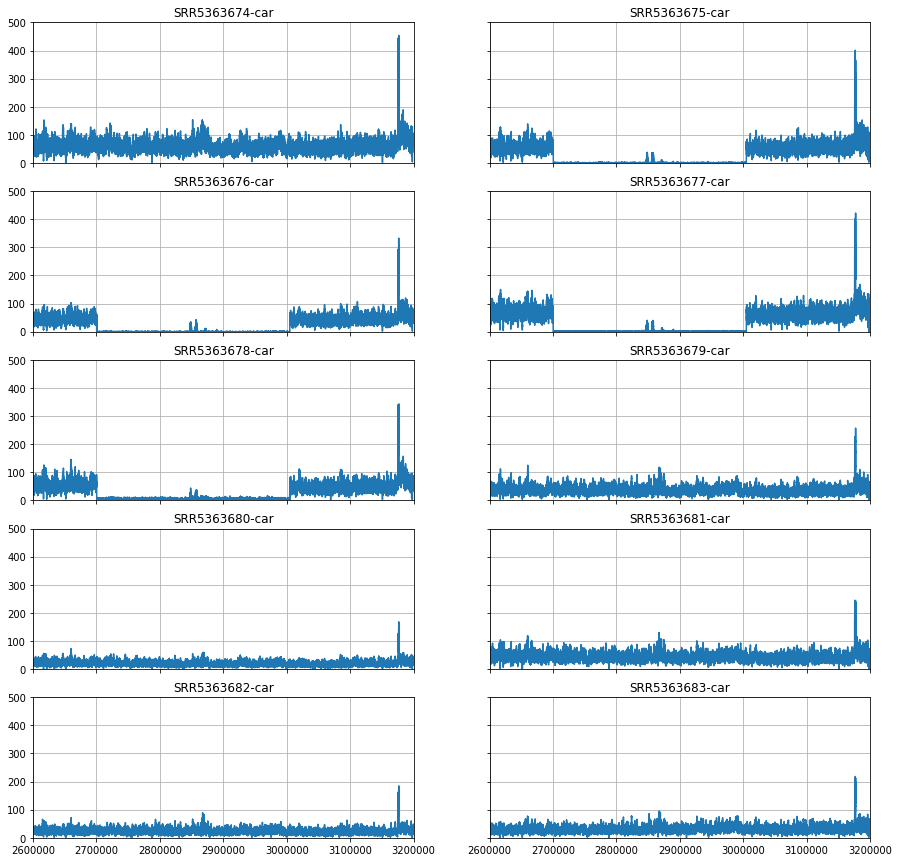

In [122]:
import numpy as np
import pylab as pl
from matplotlib import collections as mc
import matplotlib.ticker as ticker

fig, ax = pl.subplots(5,2, figsize=(15, 15), sharey=True, sharex=True )

ax = ax.ravel()

i = 0

for sample in list(cvrg):
    if sample[len(sample)-3:len(sample)] == 'car':     
        ax[i].autoscale()
        ax[i].set_title( sample )
        ax[i].plot(cvrg[sample])
        ax[i].set_ylim([0,500])
        ax[i].set_xlim([2600000,3200000])
        ax[i].grid(True)
        ax[i].margins(0.1)
        i += 1
    
pl.show()

In [70]:
%cd ..

/Volumes/data4t/seq/Barbosa_2017


## Mapping assemblies to PA01 reference to compare deletion location against [Hocquet et al. 2016](http://onlinelibrary.wiley.com/doi/10.1111/1462-2920.13336/abstract)

In [71]:
!mkdir mum_pa01

In [72]:
%cd mum_pa01/

/Volumes/data4t/seq/Barbosa_2017/mum_pa01


In [73]:
!wget http://pseudomonas.com/downloads/pseudomonas/pgd_r_17_2/Pseudomonas_aeruginosa_PAO1_107/Pseudomonas_aeruginosa_PAO1_107.fna

--2018-01-11 17:32:03--  http://pseudomonas.com/downloads/pseudomonas/pgd_r_17_2/Pseudomonas_aeruginosa_PAO1_107/Pseudomonas_aeruginosa_PAO1_107.fna
Resolving pseudomonas.com... 142.58.106.208
Connecting to pseudomonas.com|142.58.106.208|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6264506 (6.0M)
Saving to: ‘Pseudomonas_aeruginosa_PAO1_107.fna’

Pseudomonas_aerugin 100%[===================>]   5.97M  1.46MB/s    in 4.3s    

2018-01-11 17:32:08 (1.40 MB/s) - ‘Pseudomonas_aeruginosa_PAO1_107.fna’ saved [6264506/6264506]



In [74]:
!wget http://pseudomonas.com/downloads/pseudomonas/pgd_r_17_2/Pseudomonas_aeruginosa_PAO1_107/Pseudomonas_aeruginosa_PAO1_107.gtf

--2018-01-11 17:32:52--  http://pseudomonas.com/downloads/pseudomonas/pgd_r_17_2/Pseudomonas_aeruginosa_PAO1_107/Pseudomonas_aeruginosa_PAO1_107.gtf
Resolving pseudomonas.com... 142.58.106.208
Connecting to pseudomonas.com|142.58.106.208|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 987889 (965K)
Saving to: ‘Pseudomonas_aeruginosa_PAO1_107.gtf’

Pseudomonas_aerugin 100%[===================>] 964.74K  1.19MB/s    in 0.8s    

2018-01-11 17:32:53 (1.19 MB/s) - ‘Pseudomonas_aeruginosa_PAO1_107.gtf’ saved [987889/987889]



In [75]:
!cat Pseudomonas_aeruginosa_PAO1_107.fna | sed s/^\>.*/\>pa14/ > pa01.fna

In [76]:
!cat Pseudomonas_aeruginosa_PAO1_107.gtf | sed s/^chromosome/pa14/ > pa01.gtf

In [77]:
# Running nucmer: aligning assemblies of individual conditions
# against Pseudomonas_aeruginosa_PA01.fna genome

for condition in conditions:
    
    # Comment all print statements and uncomment os.system
    # To actually run these
    
    #print 'nucmer -p %s pa01.fna ../%s/assembly.fasta' % ( condition,condition )
    os.system('nucmer -p %s pa01.fna ../%s/assembly.fasta' % ( condition,condition ) )

In [78]:
# Running mummerplot: converting nucmer delta files into
# coordinates of alignable fragments

for condition in conditions:
    
    # Comment all print statements and uncomment os.system
    # To actually run these
    
    #print 'mummerplot -Q %s/assembly.fasta --layout -p %s mum/%s.delta' % ( condition, condition, condition ) 
    #print 'mv %s.fplot mum/' % condition 
    #print 'mv %s.rplot mum/' % condition 
    
    os.system('mummerplot -Q ../%s/assembly.fasta --layout -p %s %s.delta' % ( condition, condition, condition ) )
    

In [79]:
# Here we retain lines containing coordinates of alignemnts between
# individual assemblies and pa01 reference

for condition in conditions:
    os.system( "egrep -v '^0|#|^$' %s.fplot %s.rplot | cut -d \":\" -f 2 > %s.coord.tab" % ( condition, condition, condition ) )

In [80]:
# Here we read mummerplot files and load this information
# into cond_data dictionary

from collections import defaultdict
cond_data = defaultdict(list) 

for condition in conditions:
    start_end = []
    coord = []
    for n, line in enumerate( open('%s.coord.tab' % condition,'r'), 1):
        fields = line.strip().split( " " )
        if n % 2 == 1:
            start_end.append( [ int( fields[0] ), int( fields[1] ) ] )
        else:
            start_end.append( [ int( fields[0] ), int( fields[1] ) ] )
            coord.append( start_end )
            start_end = []
    cond_data[ condition ] = coord 

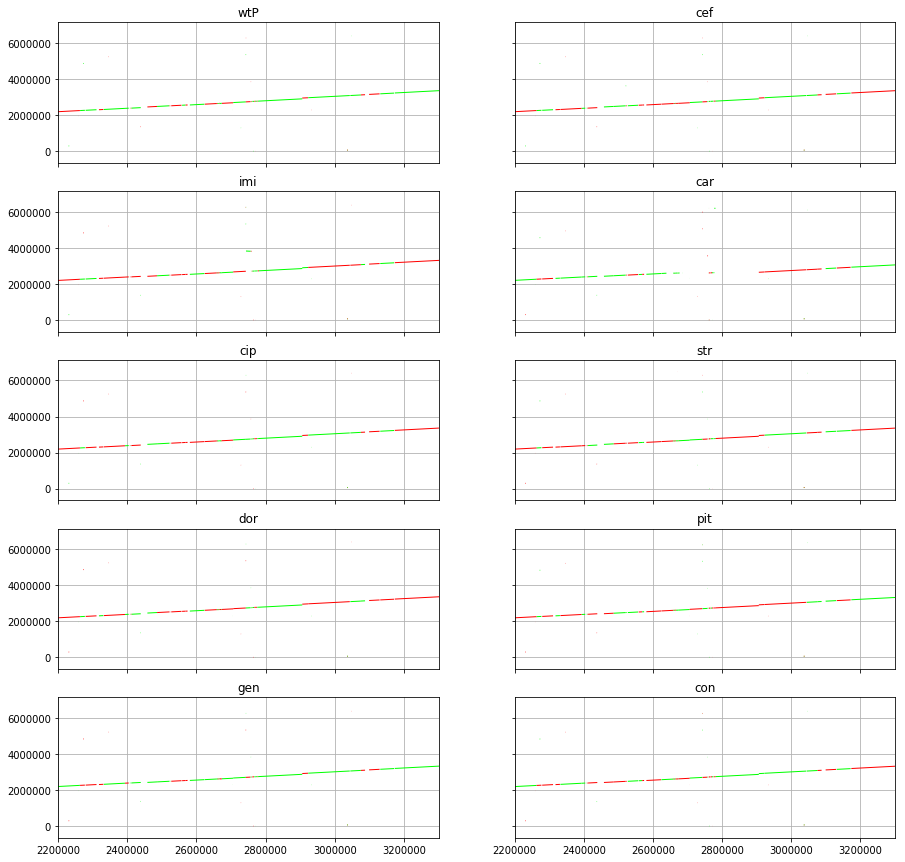

In [85]:
# Here we generate dot plot for all ten conditions
# A deletion in car assembly can be cearly see here
# Uncommenting set_ylim and set_xlim will zoom in into this deletion

import numpy as np
import pylab as pl
from matplotlib import collections as mc
import matplotlib.ticker as ticker

c = np.array([(1, 0, 0, 1), (0, 1, 0, 1)])

fig, ax = pl.subplots( 5,2, figsize=(15, 15), sharey=True, sharex=True )

ax = ax.ravel()

for i, condition in enumerate( cond_data  ):
    lc = mc.LineCollection(cond_data[ condition ], colors=c, linewidths=1)
    ax[i].add_collection(lc)
    ax[i].autoscale()
    ax[i].set_title('%s' % condition )
    ax[i].plot()
    #ax[i].set_ylim([2500000,3000000])
    ax[i].set_xlim([2200000,3300000])
    ax[i].grid(True)
    ax[i].margins(0.1)
    
pl.show()

## Processing annotation

In [87]:
!pwd

/Volumes/data4t/seq/Barbosa_2017/mum_pa01


In [4]:
%cd /Volumes/data4t/seq/Barbosa_2017/car_analysis

/Volumes/data4t/seq/Barbosa_2017/car_analysis


In [94]:
! cat pa14.gtf | sed s/gene_id\ // | sed s/\ transcript_id\ // | sed s/\ locus_tag\ // | sed s/\ name\ // | sed s/replicon_xref// |  sed s/\"//g | tr ";" "\t" | cut -f 3,4,5,6,7,8,9,10,11,12,13 > pa14_annotaion.txt

In [97]:
gtf = pd.read_table('pa14_annotaion.txt', header=None)

In [98]:
gtf.head()

,0,1,2,3,4,5,6,7,8,9,10
0,CDS,483,2027,.,+,0,PA14_00010,1650836.0,PA14_00010,"dnaA ,chromosomal replication initiation protein",NC_008463
1,CDS,2056,3159,.,+,0,PA14_00020,1650838.0,PA14_00020,"dnaN ,DNA polymerase III subunit beta",NC_008463
2,CDS,3169,4278,.,+,0,PA14_00030,1650840.0,PA14_00030,"recF ,recombination protein F",NC_008463
3,CDS,4275,6695,.,+,0,PA14_00050,1650842.0,PA14_00050,"gyrB ,DNA gyrase subunit B",NC_008463
4,CDS,7018,7791,.,-,0,PA14_00060,1650844.0,PA14_00060,acyltransferase,NC_008463


In [100]:
gtf.columns = ['type','start','end','info','strand','score','gene_id','transcript_id','locus_tag','name','replicon']

Pandas can be queried using sql-like logic as described in [here](http://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html)

In [152]:
gtf[(gtf['start'] > 2700294) & (gtf['start'] < 3004824) & ( gtf['name'] != 'hypothetical protein')].head(65)

,type,start,end,info,strand,score,gene_id,transcript_id,locus_tag,name,replicon
2529,CDS,2703604,2704179,.,-,0,PA14_31080,1655887.0,PA14_31080,conjugal transfer protein,NC_008463
2531,CDS,2705011,2705649,.,-,0,PA14_31100,1655891.0,PA14_31100,plasmid partitioning protein,NC_008463
2532,CDS,2705903,2707231,.,-,0,PA14_31110,1655893.0,PA14_31110,replication initiator and transcriptional repr...,NC_008463
2542,CDS,2715633,2716943,.,-,0,PA14_31240,1655913.0,PA14_31240,nrbE-like protein,NC_008463
2544,CDS,2718015,2718521,.,-,0,PA14_31260,1655917.0,PA14_31260,RadC-like protein,NC_008463
2546,CDS,2720008,2721213,.,-,0,PA14_31280,1655921.0,PA14_31280,integrase,NC_008463
2547,CDS,2721861,2722229,.,+,0,PA14_31290,1655923.0,PA14_31290,"pa1L ,PA-I galactophilic lectin",NC_008463
2550,CDS,2723429,2724928,.,-,0,PA14_31330,1655929.0,PA14_31330,EAL domain-containing protein,NC_008463
2555,CDS,2728313,2729800,.,-,0,PA14_31380,1655939.0,PA14_31380,sulfate transporter,NC_008463
2557,CDS,2730777,2732504,.,-,0,PA14_31400,1655943.0,PA14_31400,chemotaxis transducer,NC_008463


## Recalling varinats

In [191]:
# Here we will align individual read sets against pa14 genome
# As always uncomment os statements to run actual jobs

f = open('freebayes.sh', 'w')

for condition in conditions:
    for accession in conditions[ condition ]:
        f.write("freebayes -f pa14.fna --min-coverage 20 --min-base-quality 20 -p 1 --pooled-continuous %s-%s.bam | vcffilter -f 'QUAL > 1' -f 'DP > 20' | vcfbreakmulti > %s-%s.vcf\n" % (accession, condition, accession, condition))

f.close()        

In [192]:
!split -l 4 freebayes.sh 

In [193]:
!ls xa*

xaa xac xae xag xai xak xam xao xaq xas xau
xab xad xaf xah xaj xal xan xap xar xat


In [194]:
!ls -1 xa* | sed s/^/sh\ / | sed s/$/\ \\\&/ > start_freebayes.sh

In [195]:
!more start_freebayes.sh

sh xaa &
sh xab &
sh xac &
sh xad &
sh xae &
sh xaf &
sh xag &
sh xah &
sh xai &
sh xaj &
sh xak &
sh xal &
sh xam &
sh xan &
sh xao &
sh xap &
sh xaq &
sh xar &
sh xas &
sh xat &
sh xau &
>

In [171]:
!sh start_freebayes.sh

In [7]:
# Changing reference sequence name in vcf to "Chromsome" as it is used in SnpEff annotations
# NOTE -> This is no longer needed as I created new snpEff db from http://pseudomonas.com/strain/download data
for condition in conditions:
    for accession in conditions[ condition ]:
        os.system("cat %s-%s.vcf | sed s/^Chromosome/pa14/ > a.vcf; mv a.vcf %s-%s.vcf" % (accession, condition, accession, condition))
        #print "cat %s-%s.vcf | sed s/^pa14/Chromosome/ > a.vcf; mv a.vcf %s-%s.vcf" % (accession, condition, accession, condition)

In [8]:
# Here we annotate vcf files using SNPeff
# As always uncomment os statements to run actual jobs

f = open('run_snpEff.sh', 'w')

for condition in conditions:
    for accession in conditions[ condition ]:
        f.write("snpEff -s %s-%s -no-downstream -no-intron -no-upstream -no-utr  -no DOWNSTREAM UCBPP-PA14 %s-%s.vcf > %s-%s.ann.vcf\n" % (accession, condition, accession, condition, accession, condition))
f.close()        

In [9]:
!sh run_snpEff.sh

In [32]:
# Changing reference sequence name in vcf to "Chromsome" as it is used in SnpEff annotations
# NOTE -> This is no longer needed as I created new snpEff db from http://pseudomonas.com/strain/download data
for condition in conditions:
    for accession in conditions[ condition ]:
        os.system("snpsift extractFields %s-%s.ann.vcf CHROM POS REF ALT QUAL SAF SAR SRF SRR SAP SRP EPP DP 'ANN[*].GENEID' 'ANN[*].GENE' 'ANN[*].EFFECT' 'ANN[*].AA' 'ANN[*].IMPACT' -s ',' | sed s/^pa14/%s-%s/ >> snpeff.txt" % (accession, condition, accession, condition))
        #print "snpsift extractFields %s-%s.ann.vcf CHROM POS REF ALT QUAL SAF SAR SRF SRR SAP SRP EPP DP 'ANN[*].GENEID' 'ANN[*].GENE' 'ANN[*].EFFECT' 'ANN[*].AA' 'ANN[*].IMPACT' -s ',' | sed s/^pa14/%s-%s/ >> snpeff.txt\n" % (accession, condition, accession, condition)

In [33]:
!head -1 snpeff.txt | sed s/ANN\\\[\\\*\\\]\.//g | sed s/^CHROM/SM/ > header.txt

In [34]:
!more header.txt

SM      POS     REF     ALT     QUAL    SAF     SAR     SRF     SRR     SAP      SRP     EPP     DP      GENEID  GENE    EFFECT  AA      IMPACT
>

In [35]:
!grep -v '^CHROM' snpeff.txt > data.txt

In [36]:
!cat header.txt data.txt > snpeff.txt

In [325]:
snpeff = pd.read_table('snpeff.txt')

In [326]:
snpeff.head()

,SM,POS,REF,ALT,QUAL,SAF,SAR,SRF,SRR,SAP,SRP,EPP,DP,GENEID,GENE,EFFECT,AA,IMPACT
0,SRR5363633-wtP,41753,TCGG,CCGA,6084.44,120,105,0,0,5.18177,0.0,3.01995,225,PA14_00490,hemolysin_activation/secretion_protein,synonymous_variant,p.209,LOW
1,SRR5363633-wtP,72440,T,C,12118.50,232,146,0,0,45.49760,0.0,5.30815,378,PA14_00740,lipoprotein,missense_variant,p.Lys132Glu,MODERATE
2,SRR5363633-wtP,96307,A,C,11087.10,94,247,0,0,152.07800,0.0,4.44309,341,PA14_00970,hypothetical_protein,synonymous_variant,p.Pro49Pro,LOW
3,SRR5363633-wtP,96350,TTGTCCAGCGT,CTGGCCCGCGC,7700.35,96,149,0,0,27.90690,0.0,42.79700,248,PA14_00970,hypothetical_protein,missense_variant,p.ThrLeuAspAsn32AlaArgAlaSer,MODERATE
4,SRR5363633-wtP,96391,ACA,GCC,7676.15,108,143,0,0,13.60810,0.0,27.31180,251,PA14_00970,hypothetical_protein,missense_variant,p.Cys21Gly,MODERATE


In [327]:
len(snpeff.index)

13163

In [328]:
ids = snpeff['SM'].str.split('-', expand = True)

In [329]:
len(ids.index)

13163

In [330]:
var = pd.concat([ids,snpeff], axis=1, join="inner")

In [331]:
len(var.index)

13163

In [332]:
var = var.rename(index=str, columns={0: "ACC", 1: "EXP"})

In [333]:
from pandasql import *
pysqldf = lambda q: sqldf(q, globals())

In [334]:
var.head()

,ACC,EXP,SM,POS,REF,ALT,QUAL,SAF,SAR,SRF,SRR,SAP,SRP,EPP,DP,GENEID,GENE,EFFECT,AA,IMPACT
0,SRR5363633,wtP,SRR5363633-wtP,41753,TCGG,CCGA,6084.44,120,105,0,0,5.18177,0.0,3.01995,225,PA14_00490,hemolysin_activation/secretion_protein,synonymous_variant,p.209,LOW
1,SRR5363633,wtP,SRR5363633-wtP,72440,T,C,12118.50,232,146,0,0,45.49760,0.0,5.30815,378,PA14_00740,lipoprotein,missense_variant,p.Lys132Glu,MODERATE
2,SRR5363633,wtP,SRR5363633-wtP,96307,A,C,11087.10,94,247,0,0,152.07800,0.0,4.44309,341,PA14_00970,hypothetical_protein,synonymous_variant,p.Pro49Pro,LOW
3,SRR5363633,wtP,SRR5363633-wtP,96350,TTGTCCAGCGT,CTGGCCCGCGC,7700.35,96,149,0,0,27.90690,0.0,42.79700,248,PA14_00970,hypothetical_protein,missense_variant,p.ThrLeuAspAsn32AlaArgAlaSer,MODERATE
4,SRR5363633,wtP,SRR5363633-wtP,96391,ACA,GCC,7676.15,108,143,0,0,13.60810,0.0,27.31180,251,PA14_00970,hypothetical_protein,missense_variant,p.Cys21Gly,MODERATE


In [335]:
wt = pysqldf("select * from var where EXP = 'wtP'")

In [336]:
len(wt.index)

197

In [337]:
non_wt = pysqldf("select * from var where EXP != 'wtP'")

In [338]:
len(non_wt.index)

12966

In [339]:
ttt = pysqldf("select non_wt.*, wt.AA as wtaa from non_wt left join wt on non_wt.POS = wt.POS")

In [343]:
wt.head()

,ACC,EXP,SM,POS,REF,ALT,QUAL,SAF,SAR,SRF,SRR,SAP,SRP,EPP,DP,GENEID,GENE,EFFECT,AA,IMPACT
0,SRR5363633,wtP,SRR5363633-wtP,41753,TCGG,CCGA,6084.44,120,105,0,0,5.18177,0.0,3.01995,225,PA14_00490,hemolysin_activation/secretion_protein,synonymous_variant,p.209,LOW
1,SRR5363633,wtP,SRR5363633-wtP,72440,T,C,12118.50,232,146,0,0,45.49760,0.0,5.30815,378,PA14_00740,lipoprotein,missense_variant,p.Lys132Glu,MODERATE
2,SRR5363633,wtP,SRR5363633-wtP,96307,A,C,11087.10,94,247,0,0,152.07800,0.0,4.44309,341,PA14_00970,hypothetical_protein,synonymous_variant,p.Pro49Pro,LOW
3,SRR5363633,wtP,SRR5363633-wtP,96350,TTGTCCAGCGT,CTGGCCCGCGC,7700.35,96,149,0,0,27.90690,0.0,42.79700,248,PA14_00970,hypothetical_protein,missense_variant,p.ThrLeuAspAsn32AlaArgAlaSer,MODERATE
4,SRR5363633,wtP,SRR5363633-wtP,96391,ACA,GCC,7676.15,108,143,0,0,13.60810,0.0,27.31180,251,PA14_00970,hypothetical_protein,missense_variant,p.Cys21Gly,MODERATE


In [352]:
print pysqldf("select * from non_wt left join wt on non_wt.POS = wt.POS").head()

          ACC  EXP              SM    POS          REF          ALT      QUAL  \
0  SRR5363684  cef  SRR5363684-cef  41753         TCGG         CCGA   583.566   
1  SRR5363684  cef  SRR5363684-cef  72440            T            C  1892.440   
2  SRR5363684  cef  SRR5363684-cef  96307            A            C  1442.360   
3  SRR5363684  cef  SRR5363684-cef  96350  TTGTCCAGCGT  CTGGCCCGCGC  1051.580   
4  SRR5363684  cef  SRR5363684-cef  96391          ACA          GCC   901.709   

   SAF  SAR  SRF    ...     SRR        SAP  SRP       EPP     DP      GENEID  \
0    9   12    0    ...     0.0    5.18177  0.0   3.01995  225.0  PA14_00490   
1   38   21    0    ...     0.0   45.49760  0.0   5.30815  378.0  PA14_00740   
2   16   28    0    ...     0.0  152.07800  0.0   4.44309  341.0  PA14_00970   
3   14   20    0    ...     0.0   27.90690  0.0  42.79700  248.0  PA14_00970   
4   13   17    0    ...     0.0   13.60810  0.0  27.31180  251.0  PA14_00970   

                                

In [344]:
non_wt.head()

,ACC,EXP,SM,POS,REF,ALT,QUAL,SAF,SAR,SRF,SRR,SAP,SRP,EPP,DP,GENEID,GENE,EFFECT,AA,IMPACT
0,SRR5363684,cef,SRR5363684-cef,41753,TCGG,CCGA,583.566,9,12,0,0,3.94093,0.0,3.94093,21,PA14_00490,hemolysin_activation/secretion_protein,synonymous_variant,p.209,LOW
1,SRR5363684,cef,SRR5363684-cef,72440,T,C,1892.440,38,21,0,0,13.64680,0.0,5.99147,59,PA14_00740,lipoprotein,missense_variant,p.Lys132Glu,MODERATE
2,SRR5363684,cef,SRR5363684-cef,96307,A,C,1442.360,16,28,0,0,10.11690,0.0,3.79993,44,PA14_00970,hypothetical_protein,synonymous_variant,p.Pro49Pro,LOW
3,SRR5363684,cef,SRR5363684-cef,96350,TTGTCCAGCGT,CTGGCCCGCGC,1051.580,14,20,0,0,5.30951,0.0,7.09778,34,PA14_00970,hypothetical_protein,missense_variant,p.ThrLeuAspAsn32AlaArgAlaSer,MODERATE
4,SRR5363684,cef,SRR5363684-cef,96391,ACA,GCC,901.709,13,17,0,0,4.16842,0.0,10.24850,30,PA14_00970,hypothetical_protein,missense_variant,p.Cys21Gly,MODERATE


In [340]:
len(ttt.index)

12966

In [341]:
ttt.head(100)

,ACC,EXP,SM,POS,REF,ALT,QUAL,SAF,SAR,SRF,...,SAP,SRP,EPP,DP,GENEID,GENE,EFFECT,AA,IMPACT,wtaa
0,SRR5363684,cef,SRR5363684-cef,41753,TCGG,CCGA,583.566,9,12,0,...,3.94093,0.00000,3.94093,21,PA14_00490,hemolysin_activation/secretion_protein,synonymous_variant,p.209,LOW,p.209
1,SRR5363684,cef,SRR5363684-cef,72440,T,C,1892.440,38,21,0,...,13.64680,0.00000,5.99147,59,PA14_00740,lipoprotein,missense_variant,p.Lys132Glu,MODERATE,p.Lys132Glu
2,SRR5363684,cef,SRR5363684-cef,96307,A,C,1442.360,16,28,0,...,10.11690,0.00000,3.79993,44,PA14_00970,hypothetical_protein,synonymous_variant,p.Pro49Pro,LOW,p.Pro49Pro
3,SRR5363684,cef,SRR5363684-cef,96350,TTGTCCAGCGT,CTGGCCCGCGC,1051.580,14,20,0,...,5.30951,0.00000,7.09778,34,PA14_00970,hypothetical_protein,missense_variant,p.ThrLeuAspAsn32AlaArgAlaSer,MODERATE,p.ThrLeuAspAsn32AlaArgAlaSer
4,SRR5363684,cef,SRR5363684-cef,96391,ACA,GCC,901.709,13,17,0,...,4.16842,0.00000,10.24850,30,PA14_00970,hypothetical_protein,missense_variant,p.Cys21Gly,MODERATE,p.Cys21Gly
5,SRR5363684,cef,SRR5363684-cef,96401,G,C,867.607,11,18,0,...,6.67934,0.00000,9.07545,29,PA14_00970,hypothetical_protein,missense_variant,p.Thr18Ser,MODERATE,p.Thr18Ser
6,SRR5363684,cef,SRR5363684-cef,96406,TCG,GCC,825.270,11,16,0,...,5.02092,0.00000,3.73412,27,PA14_00970,hypothetical_protein,missense_variant,p.Arg16Gly,MODERATE,p.Arg16Gly
7,SRR5363684,cef,SRR5363684-cef,151966,A,G,1661.830,24,28,0,...,3.67845,0.00000,19.71390,52,PA14_01660-PA14_01670,guanine_deaminase-ABC_transporter_ATP-binding_...,intergenic_region,None,MODIFIER,None
8,SRR5363684,cef,SRR5363684-cef,155989,CGG,CG,1027.840,7,25,0,...,24.99650,0.00000,7.35324,33,PA14_01690,ABC_transporter_permease,frameshift_variant,p.Ala308fs,HIGH,p.Ala308fs
9,SRR5363684,cef,SRR5363684-cef,208430,TCCG,GCCC,878.189,14,15,0,...,3.08518,0.00000,6.67934,29,PA14_02310-PA14_02330,atsA_%2Carylsulfatase-ABC_transporter_ATP-bind...,intergenic_region,None,MODIFIER,None


In [342]:
pysqldf("SELECT count(*) from ttt where wtaa is NULL")

,count(*)
0,5564


In [201]:
#vc stands for Variants Clean
vc = pysqldf("SELECT * from ttt where wtaa is NULL")

In [202]:
len(vc.index)

5564

In [203]:
pysqldf("select EXP, count( distinct GENEID ) from vc where EFFECT = 'missense_variant' or EFFECT = 'synonymous_variant' group by EXP")

,EXP,count( distinct GENEID )
0,car,6
1,cef,8
2,cip,4
3,con,1
4,dor,4
5,gen,10
6,imi,4
7,pit,7
8,str,6


In [206]:
import matplotlib.pyplot as plt
%matplotlib inline

In [207]:
plt.figure()

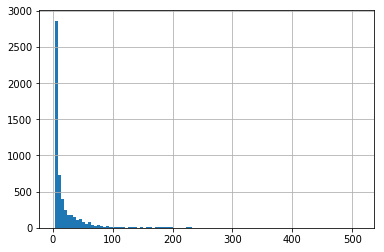

In [208]:
vc['SAP'].hist(bins=100)

In [213]:
effects = pysqldf("select distinct EFFECT from vc group by EFFECT")

In [214]:
pysqldf("select EXP, count(distinct(GENEID)) from vc where EFFECT = 'missense_variant' group by EXP")

,EXP,count(distinct(GENEID))
0,car,5
1,cef,6
2,cip,2
3,dor,2
4,gen,8
5,imi,1
6,pit,6
7,str,4


In [240]:
effects['EFFECT']

0            conservative_inframe_deletion
1              disruptive_inframe_deletion
2             disruptive_inframe_insertion
3                       frameshift_variant
4      frameshift_variant&missense_variant
5                        intergenic_region
6                       intragenic_variant
7     intragenic_variant,intergenic_region
8                         missense_variant
9                              stop_gained
10         stop_lost&splice_region_variant
11                      synonymous_variant
Name: EFFECT, dtype: object

In [220]:
effects['EFFECT'][0]

u'conservative_inframe_deletion'

In [234]:
df = pysqldf("select distinct EXP from vc")

In [235]:
df

,EXP
0,cef
1,imi
2,car
3,cip
4,str
5,dor
6,pit
7,gen
8,con


In [238]:
for effect in effects['EFFECT']:
    tmp = pysqldf("select EXP, count(distinct(GENEID)) from vc where EFFECT = '%s' group by EXP") % ( effect )
    df = pysqldf("select df.*, tmp.* from df left join tmp on df.EXP = tmp.EXP")

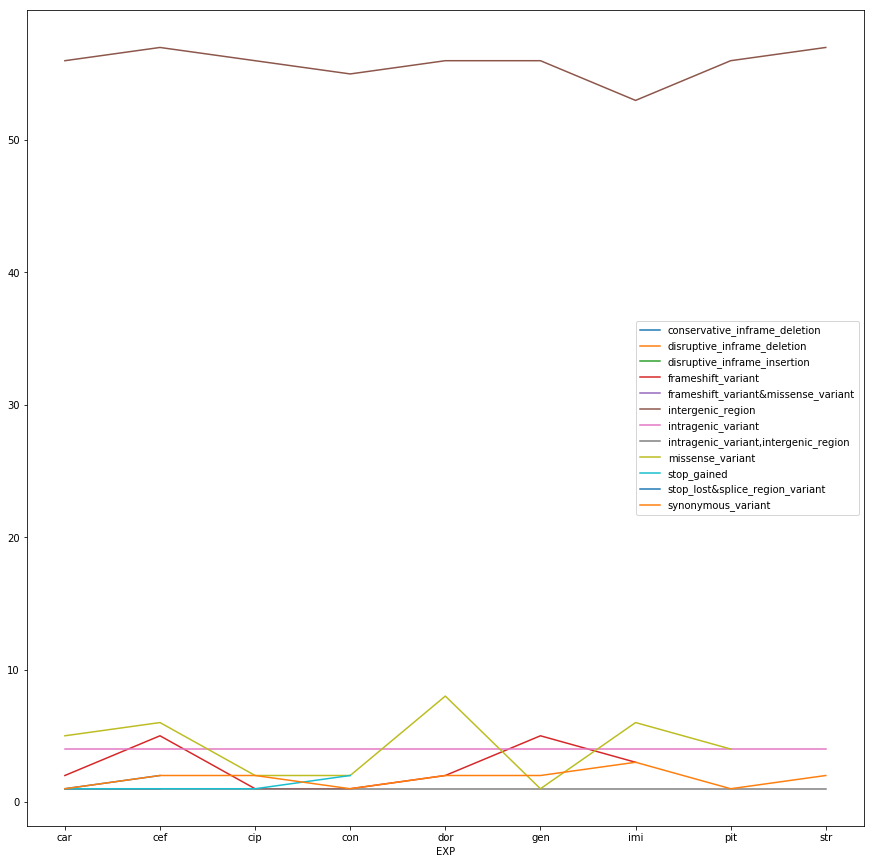

In [286]:
for effect in effects['EFFECT']:
    vc[vc['EFFECT'] == effect].groupby('EXP').GENEID.nunique().plot(legend=True,label=effect,figsize=(15,15))

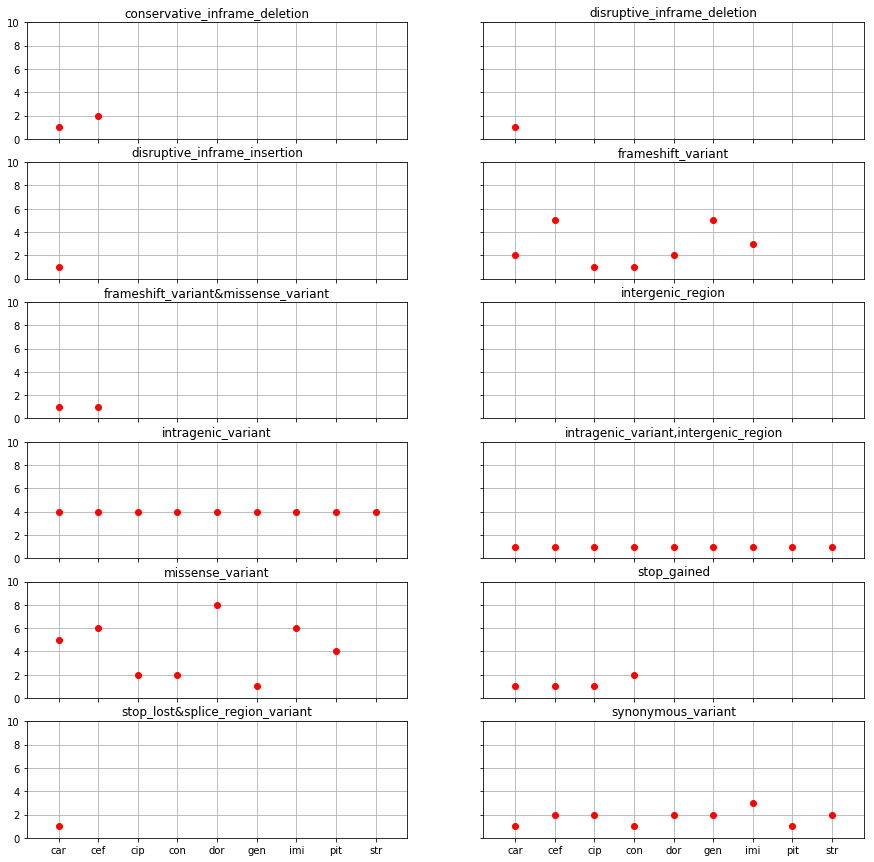

In [297]:
# Plotting the number of unique genes with different kind of mutations
# For each antibiotic treatment

import numpy as np
import pylab as pl
from matplotlib import collections as mc
import matplotlib.ticker as ticker

fig, ax = pl.subplots(6,2, figsize=(15, 15), sharey=True, sharex=True )

ax = ax.ravel()

i = 0

for effect in effects['EFFECT']:
    df = vc[vc['EFFECT'] == effect].groupby('EXP').GENEID.nunique()
    ax[i].autoscale()
    ax[i].set_title( effect )
    ax[i].plot(df,'ro')
    ax[i].set_ylim([0,10])
    #ax[i].set_xlim([2600000,3200000])
    ax[i].grid(True)
    ax[i].margins(0.1)
    i += 1
    
pl.show()

In [323]:
a = vc[vc['EFFECT'] == 'synonymous_variant']
b = pysqldf("select ACC, EXP, count(distinct(GENEID)) as N from a group by ACC")    
b.head()
b['N'].describe()
#plt.figure()
#b.boxplot(by='EXP')

count    23.000000
mean      1.043478
std       0.208514
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       2.000000
Name: N, dtype: float64

In [324]:
a.head()

,ACC,EXP,SM,POS,REF,ALT,QUAL,SAF,SAR,SRF,...,SAP,SRP,EPP,DP,GENEID,GENE,EFFECT,AA,IMPACT,wtaa
323,SRR5363688,cef,SRR5363688-cef,5461135,A,G,228.8390,17,21,9,...,3.92460,16.3106,3.92460,70,PA14_61200,hypothetical_protein,synonymous_variant,p.Asp1240Asp,LOW,None
354,SRR5363690,cef,SRR5363690-cef,810110,T,C,82.8552,1,26,1,...,53.27590,42.4916,5.02092,49,PA14_09440,phzE1_%2Cphenazine_biosynthesis_protein_PhzE,synonymous_variant,p.Pro50Pro,LOW,None
577,SRR5363694,imi,SRR5363694-imi,3446379,G,A,1048.8300,22,12,0,...,9.39698,0.0000,4.03217,34,PA14_38630,atoB_%2Cacetyl-CoA_acetyltransferase,synonymous_variant,p.Ser248Ser,LOW,None
592,SRR5363694,imi,SRR5363694-imi,4754301,T,C,3613.7400,47,59,0,...,5.96022,0.0000,5.96022,106,PA14_53610,hypothetical_protein,synonymous_variant,p.Leu38Leu,LOW,None
662,SRR5363695,imi,SRR5363695-imi,5461135,A,G,202.3160,27,37,21,...,6.40323,18.2106,5.18177,127,PA14_61200,hypothetical_protein,synonymous_variant,p.Asp1240Asp,LOW,None
